In [1]:
import pandas as pd
import numpy as np
import sqlalchemy as sq
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
myeng = sq.create_engine('mssql://DESKTOP-DKEG4M9\\SQLEXPRESS/bibex_db?trusted_connection=yes&driver=ODBC+Driver+13+for+SQL+Server')

In [3]:
source_Schema = "dbo"
source_Table = "t_asv"

#code below is just a simple query that hits bible database and pulls verses from american standard
source_Query = """
                SELECT 
                    KE.b	AS BookNum
                ,	KE.N	AS Book
                ,	KG.N	AS Genre
                ,	ASV.C	AS Chapter
                ,	ASV.v	AS Verse
                ,	ASV.t	AS Txt
                FROM Key_English		KE
                JOIN Key_Genre_English	KG
                    ON KE.g = KG.g
                JOIN t_asv				ASV
                    ON KE.b = ASV.B
                ORDER BY KE.B ASC
                """



df_pyData = pd.read_sql_query(source_Query, myeng)
df_pyData.index.rename('RowNum')

RangeIndex(start=0, stop=31103, step=1, name='RowNum')

In [4]:
##code below just shows sample of datasaet
df_pyData.head(10)

,BookNum,Book,Genre,Chapter,Verse,Txt
0,1,Genesis,Law,1,1,In the beginning God created the heavens and t...
1,1,Genesis,Law,1,2,And the earth was waste and void; and darkness...
2,1,Genesis,Law,1,3,"And God said, Let there be light: and there wa..."
3,1,Genesis,Law,1,4,"And God saw the light, that it was good: and G..."
4,1,Genesis,Law,1,5,"And God called the light Day, and the darkness..."
5,1,Genesis,Law,1,6,"And God said, Let there be a firmament in the ..."
6,1,Genesis,Law,1,7,"And God made the firmament, and divided the wa..."
7,1,Genesis,Law,1,8,And God called the firmament Heaven. And there...
8,1,Genesis,Law,1,9,"And God said, Let the waters under the heavens..."
9,1,Genesis,Law,1,10,And God called the dry land Earth; and the gat...


In [5]:
df_pyData['count of word Jesus'] = df_pyData['Txt'].apply(lambda x:x.count('Jesus'))
df_pyData['count of word God'] = df_pyData['Txt'].apply(lambda x:x.count('God'))
df_pyData['count of word god'] = df_pyData['Txt'].apply(lambda x:x.count('god'))
#df_pyData['hasgod'] = df_pyData['Txt'].str.contains('god')

#show data after materializing three new fields
df_pyData

,BookNum,Book,Genre,Chapter,Verse,Txt,count of word Jesus,count of word God,count of word god
0,1,Genesis,Law,1,1,In the beginning God created the heavens and t...,0,1,0
1,1,Genesis,Law,1,2,And the earth was waste and void; and darkness...,0,1,0
2,1,Genesis,Law,1,3,"And God said, Let there be light: and there wa...",0,1,0
3,1,Genesis,Law,1,4,"And God saw the light, that it was good: and G...",0,2,0
4,1,Genesis,Law,1,5,"And God called the light Day, and the darkness...",0,1,0
...,...,...,...,...,...,...,...,...,...
31098,66,Revelation,Apocalyptic,22,17,"And the Spirit and the bride say, Come. And he...",0,0,0
31099,66,Revelation,Apocalyptic,22,18,I testify unto every man that heareth the word...,0,1,0
31100,66,Revelation,Apocalyptic,22,19,and if any man shall take away from the words ...,0,1,0
31101,66,Revelation,Apocalyptic,22,20,"He who testifieth these things saith, Yea: I c...",1,0,0


In [9]:

df_reportData = pd.DataFrame
df_reportData = df_pyData.groupby(['BookNum', 'Book'], as_index=True).agg(
    Count_of_Word_Jesus=('count of word Jesus', 'sum'), 
    Count_of_Word_God=('count of word God', 'sum'),
    Count_of_Word_god=('count of word god', 'sum')).sort_values(['BookNum'])
df_reportData = df_reportData.reset_index()
df_reportData['Books'] = df_reportData['BookNum'].astype(str) + '-' + df_reportData['Book']
df_reportData = df_reportData.set_index('Books')
df_reportData = df_reportData.drop(['Book','BookNum'], axis=1)

#show new dataset
df_reportData

,Count_of_Word_Jesus,Count_of_Word_God,Count_of_Word_god
Books,,,
1-Genesis,0,229,4
2-Exodus,0,123,23
3-Leviticus,0,52,1
4-Numbers,0,34,3
5-Deuteronomy,0,348,45
...,...,...,...
62-1 John,12,63,0
63-2 John,2,2,0
64-3 John,0,3,0


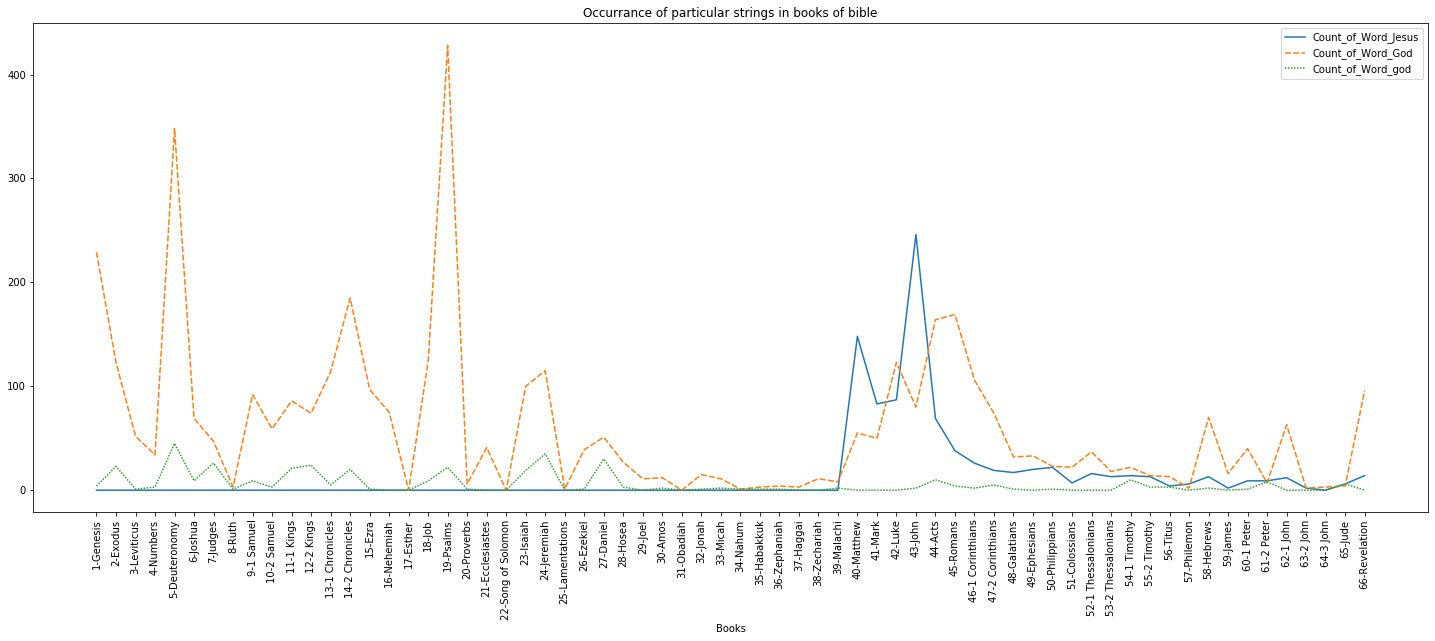

In [10]:
plt.figure(figsize=(25,9) )
plt.title('Occurrance of particular strings in books of bible')
g = sns.lineplot(data=df_reportData, size=10, sort=False)
for item in g.get_xticklabels():
    item.set_rotation(90)